In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import json
from urllib import request, response, error

In [2]:
todays_data = json.load(open('../nj_today.json','r'))['data']
todays_data_counter = Counter(todays_data)

In [3]:
todays_data_counter.most_common(5)

[('newark', 3412),
 ('jersey city', 2817),
 ('paterson', 2507),
 ('elizabeth', 2442),
 ('north bergen', 1273)]

In [4]:
todays_data_counter.most_common()[:-5:-1]

[('stillwater township', 1),
 ('upper pittsgrove township', 1),
 ('quinton township', 1),
 ('oldmans township', 1)]

In [5]:
url = 'https://raw.githubusercontent.com/saaqebs/covid19-newjersey/master/nj_total.csv'

In [6]:
df_historical = pd.read_csv(url)
date_nicer = lambda x: x.replace('-2020','').replace('-',' ').replace('april','April').replace('march','March')
df_historical['Date'] = df_historical['Date'].apply(date_nicer)
df_historical = df_historical.set_index('Date')

In [7]:
def get_graph_for_municipality(municipal):
    data = df_historical[df_historical['Municipal']==municipal.lower()]
    plt.plot(data['Cases'],linewidth=3)
    plt.xticks([0,4,8,12,16])
    plt.grid(b=True, color='black',alpha=0.5,linestyle='dashed', linewidth=0.5)
    plt.xlabel('Date')
    plt.ylabel('Number of Cases')
    plt.title('Tracking COVID-19 Cases in {}'.format(municipal))
    plt.show()

In [8]:
def get_graph_from_municipalities(municipals):
    lines = []
    data = []
    
    for municipal in municipals:
        curr_data = df_historical[df_historical['Municipal']==municipal.lower()]
        line, = plt.plot(curr_data['Cases'],linewidth=3,label=municipal)
        
        data.append(curr_data)
        lines.append(line)
    
    plt.legend(handles=lines, loc='upper left')
    plt.xticks([0,4,8,12,16,20])
    plt.grid(b=True, color='black',alpha=0.5,linestyle='dashed', linewidth=0.5)
    plt.xlabel('Date')
    plt.ylabel('Number of Cases')
    plt.show

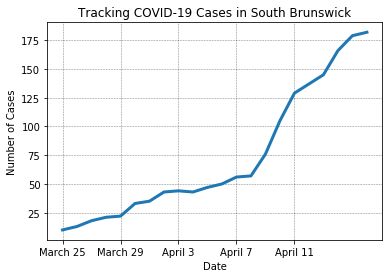

In [9]:
get_graph_for_municipality('South Brunswick')

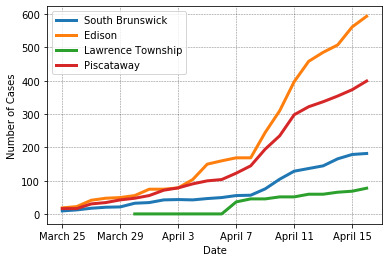

In [10]:
north = ['']
central = ['South Brunswick','Edison','Lawrence Township','Piscataway']

get_graph_from_municipalities(central)